<a href="https://colab.research.google.com/github/mazibazi/dataScienceGeo/blob/main/clusterSPT_SoilPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetSelectedLine4SoilPro_ClsuterLoc.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2
1,2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2
2,3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2
3,6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5
4,7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5


In [ ]:
df.columns.values

array(['locationId', 'Code', 'DepthUp', 'DepthDown', 'Soil', 'PhiNew',
       'Density', 'phiF', 'Nspt', 'Phi', 'C3', 'C2', 'C1', 'CuNew', 'Cu',
       'Longitude', 'Latitude', 'Address', 'cluster_label'], dtype=object)

In [ ]:
df.isna().sum()

locationId        0
Code              0
DepthUp           0
DepthDown         0
Soil              0
PhiNew            0
Density          24
phiF             15
Nspt             15
Phi              18
C3               15
C2               15
C1               15
CuNew             0
Cu               18
Longitude         0
Latitude          0
Address           0
cluster_label     0
dtype: int64

# dataframe Nspt Null study

In [ ]:
dfNspt = df.loc[:,["locationId","Code","DepthDown","Soil","Nspt","PhiNew","CuNew","Longitude", "Latitude"]]
dfNspt.head()

,locationId,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude
0,1,S1_TI-2C,9.6,Clay,20.0,23.00,0.49,-5.988427,37.36079
1,2,S1_TI-2C,24.1,Sand,31.0,30.31,0.20,-5.988427,37.36079
2,3,S1_TI-2C,30.1,Sand,NaN,23.50,0.47,-5.988427,37.36079
3,6,S1_TVII-2,7.8,Clay,10.0,23.64,0.18,-6.010817,37.39085
4,7,S1_TVII-2,10.3,Clay,NaN,23.14,0.52,-6.010817,37.39085


Percent of Null data

In [ ]:
dfNspt.isna().sum()#/ len(dfNspt)*100

locationId     0
Code           0
DepthDown      0
Soil           0
Nspt          15
PhiNew         0
CuNew          0
Longitude      0
Latitude       0
dtype: int64

In [ ]:
naSptName = dfNspt[dfNspt["Nspt"].isna()].Code.values
print(naSptName)

['S1_TI-2C' 'S1_TVII-2' 'S2_TI-1b' 'S4_TI-1b' 'S9_TI-1b' 'S9_TI-1b'
 'S6_TIII-1b' 'S6_TIII-1b' 'S7_TVII-2' 'SP17' 'S3_TVIII-1' 'S8_TVII-2'
 'S2_TV-2' 'S10_TVII-2' 'SP14']


In [ ]:
dfNsptNull = dfNspt[dfNspt["Code"].isin(naSptName)]
dfNsptNull.head()

,locationId,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude
0,1,S1_TI-2C,9.6,Clay,20.0,23.00,0.49,-5.988427,37.36079
1,2,S1_TI-2C,24.1,Sand,31.0,30.31,0.20,-5.988427,37.36079
2,3,S1_TI-2C,30.1,Sand,NaN,23.50,0.47,-5.988427,37.36079
3,6,S1_TVII-2,7.8,Clay,10.0,23.64,0.18,-6.010817,37.39085
4,7,S1_TVII-2,10.3,Clay,NaN,23.14,0.52,-6.010817,37.39085


In [ ]:
#create unique list of names
UniqueNames = dfNsptNull.Code.unique()
UniqueNames
DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = dfNsptNull[:][dfNsptNull.Code == key]

In [ ]:
len(UniqueNames)

13

In [ ]:
DataFrameDict[UniqueNames[12]]

,locationId,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude
45,125,SP14,5.6,Clay,NaN,33.53,0.18,-6.009466,37.400143


In [ ]:
df[df.Code == "S3_TVIII-1"]

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
33,80,S3_TVIII-1,8.0,8.6,Clay,22.89,1.955,NaN,NaN,22.89,NaN,NaN,NaN,0.6,0.6,-5.994372,37.364774,Puerto de Sevilla,0


**S1_TI-2C** locationId 3 Located in the Depth<br>
**S1_TVII-2** locationID 7 Second Clay<br>
**S2_TI-1b** locationId 19 Second Clay<br>
**S4_TI-1b** locationId 24 shalow Clay<br>
**S9_TI-1b** location ID 31 and 32 Clay and Second Sand<br>
**S6_TIII-1b** location ID 36 and 37 Clay and Second Sand<br>
**S7_TVII-2** locationID 47 Clay shalow <br>
**SP17** locationID 60 First shalow clay <br>
**S3_TVIII-1** locationId 80 Single shalow<br>
**S8_TVII-2** locationId 93 Single Sand?????<br>
**S2_TV-2** locationId	101 First sand Shalow<br>
**S10_TVII-2** locationId 119 Single clay shalow<br>
**SP14** locationId 125 Single Clay <br>
I Belive we can remove All of them else 

In [ ]:
dfNspt_F = dfNspt.dropna()
dfNspt_F.head()

,locationId,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude
0,1,S1_TI-2C,9.6,Clay,20.0,23.00,0.49,-5.988427,37.360790
1,2,S1_TI-2C,24.1,Sand,31.0,30.31,0.20,-5.988427,37.360790
3,6,S1_TVII-2,7.8,Clay,10.0,23.64,0.18,-6.010817,37.390850
5,8,S1_TVII-2,14.6,Sand,27.0,24.42,0.26,-6.010817,37.390850
6,14,S5_TIII-1B,8.2,Clay,32.0,25.46,0.36,-5.962946,37.401232


In [ ]:
print(f"Length new Dataframe is: {len(dfNspt_F)}, and in the Before was {len(dfNspt)}, so {len(dfNspt)-len(dfNspt_F)} is removed")

Length new Dataframe is: 32, and in the Before was 47, so 15 is removed


## Clustering Based Nspt

In [ ]:
from sklearn.preprocessing import StandardScaler

### Dataframe prepration 

In [ ]:
dfTargetClsuterNspt_F = dfNspt_F

In [ ]:
dfTargetClsuterNspt_F.drop(["Code","Longitude","Latitude"], axis=1, inplace=True)
dfTargetClsuterNspt_F.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,locationId,DepthDown,Soil,Nspt,PhiNew,CuNew
0,1,9.6,Clay,20.0,23.00,0.49
1,2,24.1,Sand,31.0,30.31,0.20
3,6,7.8,Clay,10.0,23.64,0.18
5,8,14.6,Sand,27.0,24.42,0.26
6,14,8.2,Clay,32.0,25.46,0.36


In [ ]:
dfTargetClsuterNspt_F.set_index('locationId', inplace= True)
dfTargetClsuterNspt_F.head()

,DepthDown,Soil,Nspt,PhiNew,CuNew
locationId,,,,,
1,9.6,Clay,20.0,23.00,0.49
2,24.1,Sand,31.0,30.31,0.20
6,7.8,Clay,10.0,23.64,0.18
8,14.6,Sand,27.0,24.42,0.26
14,8.2,Clay,32.0,25.46,0.36


In [ ]:
soilMap = {'Sand': 1, 'Clay': 0}
dfTargetClsuterNspt_F['Soil'] = dfTargetClsuterNspt_F['Soil'].map(soilMap)
dfTargetClsuterNspt_F.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DepthDown,Soil,Nspt,PhiNew,CuNew
locationId,,,,,
1,9.6,0,20.0,23.00,0.49
2,24.1,1,31.0,30.31,0.20
6,7.8,0,10.0,23.64,0.18
8,14.6,1,27.0,24.42,0.26
14,8.2,0,32.0,25.46,0.36


### Scale features

In [ ]:
scaled_data_F = StandardScaler().fit_transform(dfTargetClsuterNspt_F)
# scaled_data_F

In [ ]:
scaled_data_F = pd.DataFrame(scaled_data_F, 
                           columns = dfTargetClsuterNspt_F.columns, 
                           index = dfTargetClsuterNspt_F.index)

scaled_data_F.head()

,DepthDown,Soil,Nspt,PhiNew,CuNew
locationId,,,,,
1,-0.574191,-1.732051,-0.329601,-1.150659,0.822139
2,2.218520,0.577350,0.470534,-0.054168,-0.543723
6,-0.920872,-1.732051,-1.056996,-1.054660,-0.637920
8,0.388813,0.577350,0.179576,-0.937661,-0.261131
14,-0.843832,-1.732051,0.543273,-0.781662,0.209856


### Kmean Clsuter

In [ ]:
from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 5, init = 'random', random_state = 123, n_init = 1).fit(scaled_data_F)

In [ ]:
dfTargetClsuterNspt_F['seg_km1'] = seg_km1.predict(scaled_data_F)
dfTargetClsuterNspt_F.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DepthDown,Soil,Nspt,PhiNew,CuNew,seg_km1
locationId,,,,,,
1,9.6,0,20.0,23.00,0.49,1
2,24.1,1,31.0,30.31,0.20,4
6,7.8,0,10.0,23.64,0.18,1
8,14.6,1,27.0,24.42,0.26,4
14,8.2,0,32.0,25.46,0.36,0


In [ ]:
#Results
dfTargetClsuterNspt_F.groupby(['seg_km1'])[['DepthDown', 'Soil','Nspt','PhiNew', 'CuNew']].mean()

,DepthDown,Soil,Nspt,PhiNew,CuNew
seg_km1,,,,,
0,10.800000,0.0,26.000000,27.250800,0.252667
1,7.040000,0.0,16.400000,22.604000,0.426000
2,17.933333,1.0,56.333333,43.214433,0.608667
3,10.500000,1.0,14.400000,27.611940,0.525101
4,14.293750,1.0,24.000000,32.437537,0.172168


Text(0, 0.5, 'CuNew')

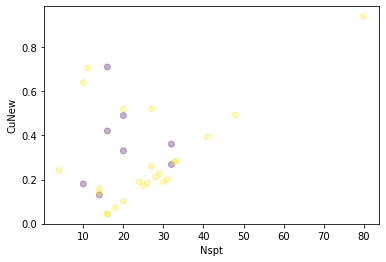

In [ ]:
#Scatter Plot - First Try
plt.scatter(x = dfTargetClsuterNspt_F['Nspt'], y = dfTargetClsuterNspt_F['CuNew'], 
            c = dfTargetClsuterNspt_F['Soil'], alpha = 0.3)
plt.xlabel('Nspt')
plt.ylabel('CuNew')

### Kmeans++

In [ ]:
#First Try
from sklearn.cluster import KMeans
seg_km3 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data_F)

In [ ]:
dfTargetClsuterNspt_F['seg_km3'] = seg_km3.predict(scaled_data_F)
dfTargetClsuterNspt_F.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DepthDown,Soil,Nspt,PhiNew,CuNew,seg_km1,seg_km3
locationId,,,,,,,
1,9.6,0,20.0,23.00,0.49,1,1
2,24.1,1,31.0,30.31,0.20,4,0
6,7.8,0,10.0,23.64,0.18,1,1
8,14.6,1,27.0,24.42,0.26,4,5
14,8.2,0,32.0,25.46,0.36,0,1


In [ ]:
dfTargetClsuterNspt_F.groupby(['seg_km3'])[['DepthDown', 'Soil','Nspt','PhiNew', 'CuNew']].mean()

,DepthDown,Soil,Nspt,PhiNew,CuNew
seg_km3,,,,,
0,17.933333,1.0,32.666667,35.823233,0.271333
1,8.450000,0.0,20.000000,24.346550,0.361000
2,20.600000,1.0,80.000000,49.976000,0.940000
3,10.055556,1.0,17.333333,31.093200,0.131186
4,9.266667,1.0,13.666667,30.723233,0.621172
5,17.350000,1.0,27.000000,21.155000,0.390000


Text(0, 0.5, 'CuNew')

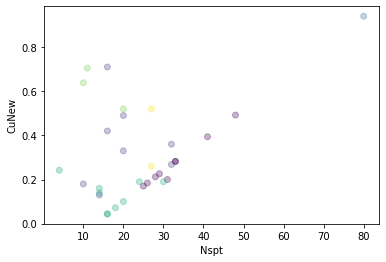

In [ ]:
#Scatter Plot - First Try
plt.scatter(x = dfTargetClsuterNspt_F['Nspt'], y = dfTargetClsuterNspt_F['CuNew'], 
            c = dfTargetClsuterNspt_F['seg_km3'], alpha = 0.3)
plt.xlabel('Nspt')
plt.ylabel('CuNew')

### Optimal Number of Clusters

#### The Elbow Method

In [ ]:
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data_F)
    sse.append(kmeans.inertia_)

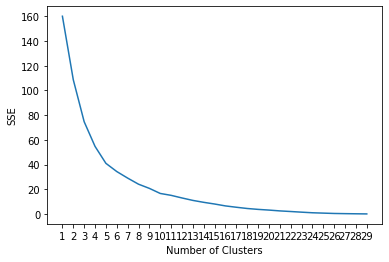

In [ ]:
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
len(dfTargetClsuterNspt_F)

32

In [ ]:
df["Nspt"].isna().sum()

15

#### Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data_F)
    score = silhouette_score(scaled_data_F, kmeans.labels_)
    silhouette_coefficients.append(score)

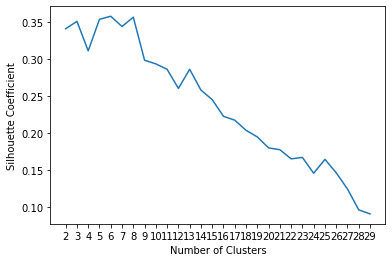

In [ ]:
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
silhouette_coefficients.index(max(silhouette_coefficients))+1

5

### Concat dataframe

In [ ]:
dfNspt_F = dfNspt.dropna()
dfNspt_F.set_index("locationId", inplace= True)
dfNspt_F.head()

,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude
locationId,,,,,,,,
1,S1_TI-2C,9.6,Clay,20.0,23.00,0.49,-5.988427,37.360790
2,S1_TI-2C,24.1,Sand,31.0,30.31,0.20,-5.988427,37.360790
6,S1_TVII-2,7.8,Clay,10.0,23.64,0.18,-6.010817,37.390850
8,S1_TVII-2,14.6,Sand,27.0,24.42,0.26,-6.010817,37.390850
14,S5_TIII-1B,8.2,Clay,32.0,25.46,0.36,-5.962946,37.401232


In [ ]:
dfTargetClsuterNspt_F.head()

,DepthDown,Soil,Nspt,PhiNew,CuNew,seg_km1,seg_km3
locationId,,,,,,,
1,9.6,0,20.0,23.00,0.49,1,1
2,24.1,1,31.0,30.31,0.20,4,0
6,7.8,0,10.0,23.64,0.18,1,1
8,14.6,1,27.0,24.42,0.26,4,5
14,8.2,0,32.0,25.46,0.36,0,1


In [ ]:
dfTemp = dfTargetClsuterNspt_F.iloc[:,[5,6]]
dfTemp.head()

,seg_km1,seg_km3
locationId,,
1,1,1
2,4,0
6,1,1
8,4,5
14,0,1


In [ ]:
df3Cluster_F = pd.concat([dfNspt_F,dfTemp], axis=1)
df3Cluster_F.head(2)

,Code,DepthDown,Soil,Nspt,PhiNew,CuNew,Longitude,Latitude,seg_km1,seg_km3
locationId,,,,,,,,,,
1,S1_TI-2C,9.6,Clay,20.0,23.00,0.49,-5.988427,37.36079,1,1
2,S1_TI-2C,24.1,Sand,31.0,30.31,0.20,-5.988427,37.36079,4,0


### Drawing on Map Based on Nspt  

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]

In [ ]:
from folium.map import Popup
location = df3Cluster_F['Latitude'].mean(), df3Cluster_F['Longitude'].mean()
mapClusterBasedSoilPro = folium.Map(location=location,zoom_start=15)

for _, row in df3Cluster_F.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"],row["Longitude"]],
        radius=12, 
        weight=2, 
        fill=True, 
        popup = "Nspt: "+str(row['Nspt'])+"\nCu: "+ str(round(row['CuNew'],3))+"\nDepthTunnel: "+ str(row['DepthDown'])+"\nLocationCode: "+ str(row['Code']),
        fill_color=colors[int(row["seg_km3"])],
        tooltip= str(row['seg_km3']),
        color=colors[int(row["seg_km3"])]
    ).add_to(mapClusterBasedSoilPro)
mapClusterBasedSoilPro

In [ ]:
BasicPath = "/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/mapAndReports/"
mapClusterBasedSoilPro.save(BasicPath+"mapClusterBasedOnSoilPro.html")

# dataframe Without Nspt effect

In [ ]:
dfTargetClsuter = df.loc[:,["locationId", "DepthDown","PhiNew","CuNew","Longitude", "Latitude"]]
dfTargetClsuter.head()

,locationId,DepthDown,PhiNew,CuNew,Longitude,Latitude
0,1,9.6,23.00,0.49,-5.988427,37.36079
1,2,24.1,30.31,0.20,-5.988427,37.36079
2,3,30.1,23.50,0.47,-5.988427,37.36079
3,6,7.8,23.64,0.18,-6.010817,37.39085
4,7,10.3,23.14,0.52,-6.010817,37.39085


In [ ]:
dfTargetClsuter.set_index('locationId', inplace= True)
dfTargetClsuter.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude
locationId,,,,,
1,9.6,23.00,0.49,-5.988427,37.36079
2,24.1,30.31,0.20,-5.988427,37.36079
3,30.1,23.50,0.47,-5.988427,37.36079
6,7.8,23.64,0.18,-6.010817,37.39085
7,10.3,23.14,0.52,-6.010817,37.39085


## Clustering

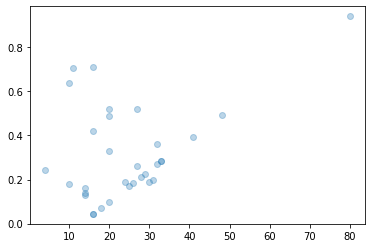

In [ ]:
plt.scatter(x = dfTargetClsuter['Nspt'], y = dfTargetClsuter['CuNew'], alpha = 0.3)

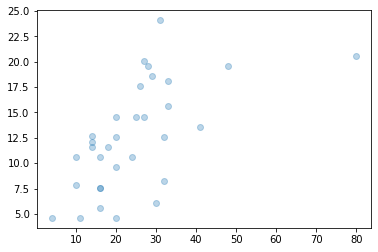

In [ ]:
plt.scatter(x = dfTargetClsuter['Nspt'], y = dfTargetClsuter['DepthDown'], alpha = 0.3)

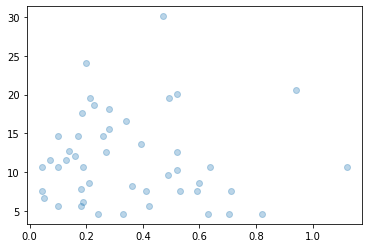

In [ ]:
plt.scatter(x = dfTargetClsuter['CuNew'], y = dfTargetClsuter['DepthDown'], alpha = 0.3)

In [ ]:
dfTargetClsuter[['Nspt', 'DepthDown', 'CuNew','PhiNew']].corr(method = 'pearson')

,Nspt,DepthDown,CuNew,PhiNew
Nspt,1.000000,0.604964,0.402466,0.679129
DepthDown,0.604964,1.000000,-0.034682,0.427912
CuNew,0.402466,-0.034682,1.000000,-0.319117
PhiNew,0.679129,0.427912,-0.319117,1.000000


## Scale features


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_data = StandardScaler().fit_transform(dfTargetClsuter)
scaled_data

In [ ]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns = dfTargetClsuter.columns, 
                           index = dfTargetClsuter.index)

scaled_data.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude,seg_km1
locationId,,,,,,
1,-0.360792,-0.561105,0.542924,0.470098,-1.333169,-0.741249
2,2.184547,0.304399,-0.638096,0.470098,-1.333169,-1.612217
3,3.237790,-0.501905,0.461474,0.470098,-1.333169,-1.612217
6,-0.676765,-0.485329,-0.719546,-0.911391,0.596522,0.129719
7,-0.237914,-0.544529,0.665098,-0.911391,0.596522,-0.741249


## Kmean Clsuter

In [ ]:
from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 5, init = 'random', random_state = 123, n_init = 1).fit(scaled_data)

In [ ]:
dfTargetClsuter['seg_km1'] = seg_km1.predict(scaled_data)
dfTargetClsuter.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude,seg_km1
locationId,,,,,,
1,9.6,23.00,0.49,-5.988427,37.36079,1
2,24.1,30.31,0.20,-5.988427,37.36079,0
3,30.1,23.50,0.47,-5.988427,37.36079,0
6,7.8,23.64,0.18,-6.010817,37.39085,2
7,10.3,23.14,0.52,-6.010817,37.39085,1


In [ ]:
#Results
dfTargetClsuter.groupby(['seg_km1'])[['DepthDown', 'PhiNew', 'CuNew','Longitude']].mean()

,DepthDown,PhiNew,CuNew,Longitude
seg_km1,,,,
0,20.242857,34.133729,0.387429,-5.988230
1,9.250000,18.803750,0.538750,-5.995933
2,10.661905,30.117281,0.160603,-6.006914
3,11.050000,30.673375,0.554940,-5.971246
4,6.600000,12.173333,0.643333,-6.004636


Text(0, 0.5, 'CuNew')

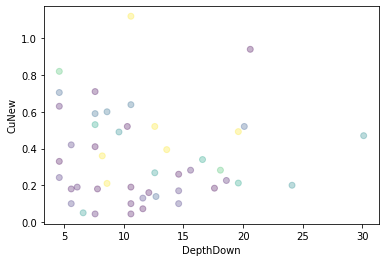

In [ ]:
#Scatter Plot - First Try
plt.scatter(x = dfTargetClsuter['DepthDown'], y = dfTargetClsuter['CuNew'], 
            c = dfTargetClsuter['Longitude'], alpha = 0.3)
plt.xlabel('DepthDown')
plt.ylabel('CuNew')

## Kmeans++

In [ ]:
#First Try
from sklearn.cluster import KMeans
seg_km3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data)

In [ ]:
dfTargetClsuter['seg_km3'] = seg_km3.predict(scaled_data)
dfTargetClsuter.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude,seg_km1,seg_km3
locationId,,,,,,,
1,9.6,23.00,0.49,-5.988427,37.36079,1,1
2,24.1,30.31,0.20,-5.988427,37.36079,0,3
3,30.1,23.50,0.47,-5.988427,37.36079,0,3
6,7.8,23.64,0.18,-6.010817,37.39085,2,0
7,10.3,23.14,0.52,-6.010817,37.39085,1,1


In [ ]:
dfTargetClsuter.groupby(['seg_km3'])[['DepthDown', 'PhiNew', 'CuNew','Longitude']].mean()

,DepthDown,PhiNew,CuNew,Longitude
seg_km3,,,,
0,10.865000,30.291145,0.166134,-6.007955
1,8.955556,19.674444,0.484444,-5.994839
2,7.600000,18.958283,0.732253,-5.994808
3,20.242857,34.133729,0.387429,-5.988230
4,12.520000,33.631460,0.395200,-5.963006


Text(0, 0.5, 'CuNew')

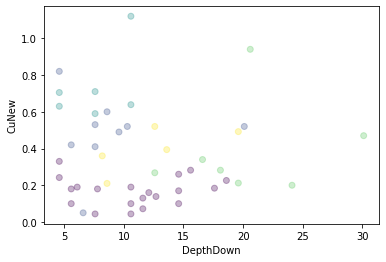

In [ ]:
#Scatter Plot - First Try
plt.scatter(x = dfTargetClsuter['DepthDown'], y = dfTargetClsuter['CuNew'], 
            c = dfTargetClsuter['seg_km3'], alpha = 0.3)
plt.xlabel('DepthDown')
plt.ylabel('CuNew')

## Optimal Number of Clusters

### The Elbow Method

In [ ]:
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

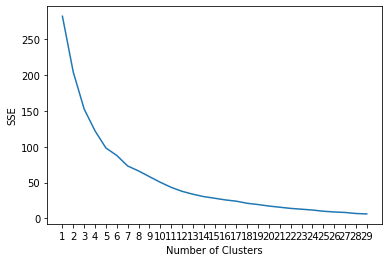

In [ ]:
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
len(dfTargetClsuter)

47

In [ ]:
df["Nspt"].isna().sum()

15

### Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

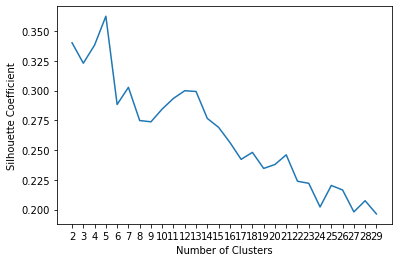

In [ ]:
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Drawing on the Map

In [ ]:
dfTargetClsuter.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude,seg_km1,seg_km3
locationId,,,,,,,
1,9.6,23.00,0.49,-5.988427,37.36079,1,1
2,24.1,30.31,0.20,-5.988427,37.36079,0,3
3,30.1,23.50,0.47,-5.988427,37.36079,0,3
6,7.8,23.64,0.18,-6.010817,37.39085,2,0
7,10.3,23.14,0.52,-6.010817,37.39085,1,1


In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]
  

In [ ]:
from folium.map import Popup
location = dfTargetClsuter['Latitude'].mean(), dfTargetClsuter['Longitude'].mean()
mapCluster = folium.Map(location=location,zoom_start=15)

for _, row in dfTargetClsuter.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"],row["Longitude"]],
        radius=12, 
        weight=2, 
        fill=True, 
        popup = "Nspt: "+str(row['DepthDown'])+"\nCu: "+ str(round(row['CuNew'],3))+"\nOtherCluter: "+ str(row['seg_km1']),
        fill_color=colors[int(row["seg_km3"])],
        tooltip= str(row['seg_km3']),
        color=colors[int(row["seg_km3"])]
    ).add_to(mapCluster)
mapCluster

# Find Null Nspt and Fill

## making Data frame

In [ ]:
dfTargetClsuter.head()

,DepthDown,PhiNew,CuNew,Longitude,Latitude,seg_km1,seg_km3
locationId,,,,,,,
1,9.6,23.00,0.49,-5.988427,37.36079,1,1
2,24.1,30.31,0.20,-5.988427,37.36079,0,3
3,30.1,23.50,0.47,-5.988427,37.36079,0,3
6,7.8,23.64,0.18,-6.010817,37.39085,2,0
7,10.3,23.14,0.52,-6.010817,37.39085,1,1


In [ ]:
dfNew = df
dfNew.set_index('locationId',inplace=True)
dfNew.head()

,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
locationId,,,,,,,,,,,,,,,,,,
1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2
2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2
3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2
6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5
7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5


In [ ]:
# dfNew.merge(dfTargetClsuter.iloc[:,[5,6]], right_on="seg_km1",left_on="Code")
df3Cluster = pd.concat([dfNew, dfTargetClsuter.iloc[:,[5,6]],], axis=1)
df3Cluster.head()

,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label,seg_km1,seg_km3
locationId,,,,,,,,,,,,,,,,,,,,
1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2,1,1
2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2,0,3
3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2,0,3
6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5,2,0
7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5,1,1


In [ ]:
df3Cluster[["seg_km1","seg_km3"]].head()

,seg_km1,seg_km3
locationId,,
1,1,1
2,0,3
3,0,3
6,2,0
7,1,1


A data frame with Nspt and Soil proeprties

In [ ]:
df3Cluster.head()

,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label,seg_km1,seg_km3
locationId,,,,,,,,,,,,,,,,,,,,
1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2,1,1
2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2,0,3
3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2,0,3
6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5,2,0
7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5,1,1


## Split Data frame based on Group

In [ ]:
clusterName = df3Cluster.seg_km3.unique()
clusterName

array([1, 3, 0, 4, 2], dtype=int32)

In [ ]:
DataFrameDict = {elem : pd.DataFrame() for elem in clusterName}
DataFrameDict

{0: Empty DataFrame
 Columns: []
 Index: [], 1: Empty DataFrame
 Columns: []
 Index: [], 2: Empty DataFrame
 Columns: []
 Index: [], 3: Empty DataFrame
 Columns: []
 Index: [], 4: Empty DataFrame
 Columns: []
 Index: []}

In [ ]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = df3Cluster[:][df3Cluster.seg_km3 == key]

### Cluster 0

In [ ]:
dfClsuter0 = DataFrameDict[0]
dfClsuter0

,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label,seg_km1,seg_km3
locationId,,,,,,,,,,,,,,,,,,,,
6,S1_TVII-2,7.2,7.8,Clay,23.6400,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.180000,0.18,-6.010817,37.390850,C/ Odiel,5,2,0
8,S1_TVII-2,14.0,14.6,Sand,24.4200,1.875,34.8339,27.0,24.42,0.198000,41.55,172.863,0.260000,0.26,-6.010817,37.390850,C/ Odiel,5,2,0
44,S4_TVI-1,10.0,10.6,Sand,31.6912,NaN,31.6912,16.0,NaN,0.044000,17.90,101.539,0.044000,NaN,-6.010093,37.398565,C/ Americo Vespucio,5,2,0
48,S7_TVII-2,11.0,11.6,Sand,32.2626,NaN,32.2626,18.0,NaN,0.072000,22.20,114.507,0.072000,NaN,-6.010905,37.386979,Ronda Triana,1,2,0
54,SP16,14.0,14.6,Sand,34.2625,NaN,34.2625,25.0,NaN,0.170000,37.25,159.895,0.170000,NaN,-6.005210,37.375729,Calle Niebla,4,2,0
60,SP17,5.0,5.6,Clay,27.8000,1.890,NaN,NaN,27.80,NaN,NaN,NaN,0.100000,0.10,-6.003685,37.370576,Calle Alfonso Borbon,4,2,0
61,SP17,11.0,11.6,Clay,20.0300,NaN,31.1198,14.0,20.03,0.016000,13.60,88.571,0.130000,0.13,-6.003685,37.370576,Calle Alfonso Borbon,4,2,0
62,SP17,14.0,14.6,Sand,32.8340,NaN,32.8340,20.0,NaN,0.100000,26.50,127.475,0.100000,NaN,-6.003685,37.370576,Calle Alfonso Borbon,4,2,0
67,S1_TVIII-1,12.1,12.7,Sand,31.1198,NaN,31.1198,14.0,NaN,0.016000,13.60,88.571,0.138681,NaN,-5.997485,37.369618,C/ Antonio Bienvenida (Feria),4,2,0
